In [68]:
# This version of the model uses train, test and validation datasets to assess model fit.
# Loss and learning curves for training and validated are addded to help in assessing model fit/ over-fit

In [69]:
# Import our dependencies
import numpy as np
import pandas as pd
import re
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
# input merged dataset
df=pd.read_csv("Resources/merged_movies.csv", low_memory=False)
print(df.describe())
print(df.columns)


           avg_vote     budget_TM      duration   g_Action_IM   g_Action_TM  \
count  70529.000000  2.697500e+04  70529.000000  70529.000000  26975.000000   
mean       5.790186  6.904748e+06    102.113414      0.161976      0.177164   
std        1.275937  2.210057e+07     21.708421      0.368431      0.381815   
min        1.000000  0.000000e+00     41.000000      0.000000      0.000000   
25%        5.000000  0.000000e+00     90.000000      0.000000      0.000000   
50%        6.000000  0.000000e+00     97.000000      0.000000      0.000000   
75%        6.700000  7.500000e+05    110.000000      0.000000      0.000000   
max        9.900000  3.800000e+08    808.000000      1.000000      1.000000   

            g_Adult  g_Adventure_IM  g_Adventure_TM  g_Animation_IM  \
count  70529.000000    70529.000000    26975.000000    70529.000000   
mean       0.000028        0.078379        0.081816        0.028995   
std        0.005325        0.268769        0.274090        0.167794   
min 

In [71]:
# select columns to keep for model; drop genre variables from TMDB
print(df)
new_df = df.drop(['g_Action_TM', 'g_Adventure_TM', 'g_Animation_TM', 'g_Comedy_TM', 'g_Crime_TM', 
       'g_Documentary_TM', 'g_Drama_TM', 'g_Family_TM', 'g_Fantasy_TM', 'g_History_TM', 'g_Horror_TM',
       'g_Music_TM', 'g_Mystery_TM', 'g_News', 'g_Reality_TV', 'g_Romance_TM',
       'g_Sci_Fi', 'g_Sport', 'g_Thriller_TM','g_War_TM', 'g_Western_TM'], axis=1)


print(new_df.columns)

          _merge  avg_vote  budget_IM  budget_TM collection          country  \
0      left_only       6.3        NaN        NaN        NaN        Australia   
1      left_only       6.8        NaN        NaN        NaN          Germany   
2      left_only       7.0        NaN        NaN        NaN           France   
3      left_only       7.2  $ 2500000        NaN        NaN              USA   
4      left_only       8.1        NaN        NaN        NaN              USA   
...          ...       ...        ...        ...        ...              ...   
70524  left_only       5.3        NaN        NaN        NaN  France, Belgium   
70525  left_only       7.7        NaN        NaN        NaN      Netherlands   
70526  left_only       7.9        NaN        NaN        NaN            India   
70527  left_only       6.4        NaN        NaN        NaN           Turkey   
70528  left_only       6.7        NaN        NaN        NaN            Spain   

                               director

In [72]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70529 entries, 0 to 70528
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _merge                 70529 non-null  object 
 1   avg_vote               70529 non-null  float64
 2   budget_IM              21107 non-null  object 
 3   budget_TM              26975 non-null  float64
 4   collection             26975 non-null  object 
 5   country                70465 non-null  object 
 6   director_list          70445 non-null  object 
 7   duration               70529 non-null  float64
 8   g_Action_IM            70529 non-null  float64
 9   g_Adult                70529 non-null  float64
 10  g_Adventure_IM         70529 non-null  float64
 11  g_Animation_IM         70529 non-null  float64
 12  g_Biography            70529 non-null  float64
 13  g_Comedy_IM            70529 non-null  float64
 14  g_Crime_IM             70529 non-null  float64
 15  g_

In [73]:
# null values cause the loss function to be null
# drop variables with a high percentage of missing

#  2   budget_IM              21107 non-null  object 
#  3   budget_TM              26975 non-null  float64
#  4   collection             26975 non-null  object 
#  19  g_Foreign              26975 non-null  float64
#  30  genre_name             25921 non-null  object 
#  33  metascore              12858 non-null  float64
#  34  orig_lang_cd           26975 non-null  object 
#  35  original_language      26974 non-null  object 
#  36  popularity             26975 non-null  float64
#  38  release_year_TM        26975 non-null  float64
#  39  revenue                26975 non-null  float64
#  42  runtime                26882 non-null  float64
#  44  usa_gross_income       14632 non-null  object 
#  46  website                26975 non-null  object 
#  47  worlwide_gross_income  30375 non-null  object 
new_df.drop(["budget_IM", "budget_TM", "collection", "g_Foreign", "genre_name", "metascore", "orig_lang_cd", "original_language", 
"popularity", "release_year_TM", "revenue", "runtime", "usa_gross_income", "website", "worlwide_gross_income"], axis=1, inplace=True)

In [74]:
new_df.info()

#  2   country               70465 non-null  object 
#  3   director_list         70445 non-null  object
#  27  language              69913 non-null  object 
#  29  reviews_from_critics  60360 non-null  float64
#  30  reviews_from_users    63624 non-null  float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70529 entries, 0 to 70528
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _merge                70529 non-null  object 
 1   avg_vote              70529 non-null  float64
 2   country               70465 non-null  object 
 3   director_list         70445 non-null  object 
 4   duration              70529 non-null  float64
 5   g_Action_IM           70529 non-null  float64
 6   g_Adult               70529 non-null  float64
 7   g_Adventure_IM        70529 non-null  float64
 8   g_Animation_IM        70529 non-null  float64
 9   g_Biography           70529 non-null  float64
 10  g_Comedy_IM           70529 non-null  float64
 11  g_Crime_IM            70529 non-null  float64
 12  g_Documentary_IM      70529 non-null  float64
 13  g_Drama_IM            70529 non-null  float64
 14  g_Family_IM           70529 non-null  float64
 15  g_Fantasy_IM       

In [75]:
# For this pass, drop any rows with missing values. Reassess whether the nulls can/should be recoded and kept.
new_df.dropna(axis=0, how="any", inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56037 entries, 0 to 70525
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _merge                56037 non-null  object 
 1   avg_vote              56037 non-null  float64
 2   country               56037 non-null  object 
 3   director_list         56037 non-null  object 
 4   duration              56037 non-null  float64
 5   g_Action_IM           56037 non-null  float64
 6   g_Adult               56037 non-null  float64
 7   g_Adventure_IM        56037 non-null  float64
 8   g_Animation_IM        56037 non-null  float64
 9   g_Biography           56037 non-null  float64
 10  g_Comedy_IM           56037 non-null  float64
 11  g_Crime_IM            56037 non-null  float64
 12  g_Documentary_IM      56037 non-null  float64
 13  g_Drama_IM            56037 non-null  float64
 14  g_Family_IM           56037 non-null  float64
 15  g_Fantasy_IM       

In [76]:
# check count of unique values for each non-numeric object
#  0   _merge                56037 non-null  object   drop
#  2   country               56037 non-null  object 
#  3   director_list         56037 non-null  object 
#  25  genre_list            56037 non-null  object 
#  26  imdb_id               56037 non-null  object   drop
#  27  language              56037 non-null  object 
#  31  title                 56037 non-null  object   drop

categorical_cols = ["country", "director_list", "genre_list", "language"]
for col in categorical_cols:
    print(f'\n value_counts in {col} column: {df[col].nunique()}')


 value_counts in country column: 4806

 value_counts in director_list column: 31990

 value_counts in genre_list column: 1082

 value_counts in language column: 4162


In [77]:
new_df.head(20)

,_merge,avg_vote,country,director_list,duration,g_Action_IM,g_Adult,g_Adventure_IM,g_Animation_IM,g_Biography,...,g_Western_IM,genre_list,imdb_id,language,release_year_IM,reviews_from_critics,reviews_from_users,title,votes,year
0,left_only,6.3,Australia,['Raymond Longford'],106.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"['Drama', ' Romance']",tt0010680,English,2005.0,10.0,11.0,The Sentimental Bloke,237.0,1919.0
1,left_only,6.8,Germany,['Arthur Robison'],90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"['Drama', ' Fantasy', ' Horror']",tt0013579,German,2016.0,16.0,15.0,Ombre ammonitrici,842.0,1923.0
2,left_only,7.0,France,['Jean Epstein'],45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"['Drama', ' Romance']",tt0017938,"None, French",1983.0,4.0,7.0,La glace à trois faces,759.0,1983.0
3,left_only,7.2,USA,['Cecil B. DeMille'],160.0,0.0,0.0,0.0,0.0,1.0,...,0.0,"['Biography', ' Drama', ' History']",tt0018054,English,2004.0,24.0,48.0,Il re dei re,1890.0,1927.0
4,left_only,8.1,USA,"['Edward Sedgwick', ' Buster Keaton']",76.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"['Comedy', ' Drama', ' Family']",tt0018742,English,1970.0,49.0,61.0,Il cameraman,10101.0,1928.0
5,left_only,6.5,"UK, India, Germany",['Franz Osten'],74.0,0.0,0.0,1.0,0.0,0.0,...,0.0,"['Adventure', ' Drama', ' Romance']",tt0020286,English,2008.0,14.0,8.0,Prapancha Pash,710.0,1929.0
6,left_only,7.0,USA,"['Edward Sedgwick', ' Buster Keaton']",76.0,0.0,0.0,0.0,0.0,0.0,...,0.0,['Comedy'],tt0020442,English,1972.0,18.0,30.0,Io... e l'amore,1811.0,1929.0
7,left_only,7.1,USA,['Roy Del Ruth'],79.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"['Comedy', ' Crime', ' Drama']",tt0021673,English,2020.0,16.0,34.0,La bionda e l'avventuriero,1561.0,1931.0
9,left_only,6.7,India,"['Vishnupant Govind Damle', ' Sheikh Fattelal']",131.0,0.0,0.0,0.0,0.0,1.0,...,0.0,['Biography'],tt0028217,"Marathi, Hindi",2013.0,1.0,3.0,Sant Tukaram,218.0,1936.0
10,left_only,5.9,USA,['Orson Welles'],67.0,0.0,0.0,0.0,0.0,0.0,...,0.0,['Comedy'],tt0030881,English,2013.0,16.0,10.0,Too Much Johnson,534.0,1938.0


In [78]:
# drop columns with multiple values in cells, handle in next model update
new_df.drop(["_merge", "country", "director_list", "genre_list", "imdb_id", "language", "title"], axis=1, inplace=True)

In [79]:
# Choose dependent = predicted value:
# Options: avg_vote, reviews_from_critics, reviews_from_users, votes

C:\Users\kathy\anaconda3\envs\py37nbext\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_vote', ylabel='Density'>

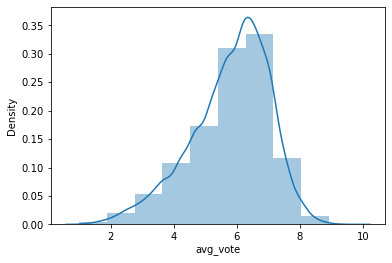

In [80]:
import seaborn as sns
# Density plot of average rating
sns.distplot(new_df["avg_vote"], hist=True, kde=True, bins=10)

In [81]:
# For this model pass, use avg_vote >= 7 as success
new_df["success"] = new_df["avg_vote"].map(lambda x: 1 if x>= 7.0 else 0)

In [82]:
new_df["success"].value_counts()

0    46398
1     9639
Name: success, dtype: int64

In [83]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56037 entries, 0 to 70525
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_vote              56037 non-null  float64
 1   duration              56037 non-null  float64
 2   g_Action_IM           56037 non-null  float64
 3   g_Adult               56037 non-null  float64
 4   g_Adventure_IM        56037 non-null  float64
 5   g_Animation_IM        56037 non-null  float64
 6   g_Biography           56037 non-null  float64
 7   g_Comedy_IM           56037 non-null  float64
 8   g_Crime_IM            56037 non-null  float64
 9   g_Documentary_IM      56037 non-null  float64
 10  g_Drama_IM            56037 non-null  float64
 11  g_Family_IM           56037 non-null  float64
 12  g_Fantasy_IM          56037 non-null  float64
 13  g_History_IM          56037 non-null  float64
 14  g_Horror_IM           56037 non-null  float64
 15  g_Music_IM         

In [84]:
# Drop unneeded variables
new_df.drop(["avg_vote", "reviews_from_users", "reviews_from_critics", "votes"], axis=1, inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56037 entries, 0 to 70525
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration          56037 non-null  float64
 1   g_Action_IM       56037 non-null  float64
 2   g_Adult           56037 non-null  float64
 3   g_Adventure_IM    56037 non-null  float64
 4   g_Animation_IM    56037 non-null  float64
 5   g_Biography       56037 non-null  float64
 6   g_Comedy_IM       56037 non-null  float64
 7   g_Crime_IM        56037 non-null  float64
 8   g_Documentary_IM  56037 non-null  float64
 9   g_Drama_IM        56037 non-null  float64
 10  g_Family_IM       56037 non-null  float64
 11  g_Fantasy_IM      56037 non-null  float64
 12  g_History_IM      56037 non-null  float64
 13  g_Horror_IM       56037 non-null  float64
 14  g_Music_IM        56037 non-null  float64
 15  g_Musical         56037 non-null  float64
 16  g_Mystery_IM      56037 non-null  float6

In [85]:
cat_vars = ['g_Action_IM', 'g_Adult', 'g_Adventure_IM',
       'g_Animation_IM', 'g_Biography', 'g_Comedy_IM', 'g_Crime_IM',
       'g_Documentary_IM', 'g_Drama_IM', 'g_Family_IM', 'g_Fantasy_IM',
       'g_History_IM', 'g_Horror_IM', 'g_Music_IM', 'g_Musical',
       'g_Mystery_IM', 'g_Romance_IM', 'g_Thriller_IM', 'g_War_IM',
       'g_Western_IM']


In [86]:
from sklearn.preprocessing import OneHotEncoder
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df =pd.DataFrame(enc.fit_transform(new_df[cat_vars]))
# Add the encoded variable names to the DataFrame
encode_df.columns =enc.get_feature_names(cat_vars)
encode_df.head()

,g_Action_IM_0.0,g_Action_IM_1.0,g_Adult_0.0,g_Adult_1.0,g_Adventure_IM_0.0,g_Adventure_IM_1.0,g_Animation_IM_0.0,g_Animation_IM_1.0,g_Biography_0.0,g_Biography_1.0,...,g_Mystery_IM_0.0,g_Mystery_IM_1.0,g_Romance_IM_0.0,g_Romance_IM_1.0,g_Thriller_IM_0.0,g_Thriller_IM_1.0,g_War_IM_0.0,g_War_IM_1.0,g_Western_IM_0.0,g_Western_IM_1.0
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [87]:
# Merge one-hot encoded features and drop the originals
clean_df =new_df.merge(encode_df,left_index=True,right_index=True)
print(clean_df.head())
print(type(clean_df))

   duration  g_Action_IM  g_Adult  g_Adventure_IM  g_Animation_IM  \
0     106.0          0.0      0.0             0.0             0.0   
1      90.0          0.0      0.0             0.0             0.0   
2      45.0          0.0      0.0             0.0             0.0   
3     160.0          0.0      0.0             0.0             0.0   
4      76.0          0.0      0.0             0.0             0.0   

   g_Biography  g_Comedy_IM  g_Crime_IM  g_Documentary_IM  g_Drama_IM  ...  \
0          0.0          0.0         0.0               0.0         1.0  ...   
1          0.0          0.0         0.0               0.0         1.0  ...   
2          0.0          0.0         0.0               0.0         1.0  ...   
3          1.0          0.0         0.0               0.0         1.0  ...   
4          0.0          1.0         0.0               0.0         1.0  ...   

   g_Mystery_IM_0.0  g_Mystery_IM_1.0  g_Romance_IM_0.0  g_Romance_IM_1.0  \
0               1.0               0.0  

In [88]:
clean_df.drop(cat_vars,axis=1, inplace=True)
print(clean_df)

       duration  release_year_IM    year  success  g_Action_IM_0.0  \
0         106.0           2005.0  1919.0        0              1.0   
1          90.0           2016.0  1923.0        0              1.0   
2          45.0           1983.0  1983.0        1              1.0   
3         160.0           2004.0  1927.0        1              1.0   
4          76.0           1970.0  1928.0        1              1.0   
...         ...              ...     ...      ...              ...   
56032     119.0           2014.0  2014.0        0              1.0   
56033     131.0           2014.0  2014.0        0              0.0   
56034     109.0           2014.0  2014.0        0              1.0   
56035      95.0           2018.0  2017.0        0              1.0   
56036     103.0           2014.0  2014.0        1              1.0   

       g_Action_IM_1.0  g_Adult_0.0  g_Adult_1.0  g_Adventure_IM_0.0  \
0                  0.0          1.0          0.0                 1.0   
1              

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split our preprocessed data into our features and target arrays
y =clean_df["success"].values
X =clean_df.drop(["success"],1).values

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test =train_test_split(X,y,stratify=y,random_state=78)

In [90]:
print(type(X_train))
print(X_train)
print(y_train)

<class 'numpy.ndarray'>
[[8.400e+01 2.018e+03 2.015e+03 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.040e+02 1.993e+03 1.993e+03 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.280e+02 2.010e+03 2.010e+03 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [9.600e+01 2.007e+03 2.007e+03 ... 0.000e+00 1.000e+00 0.000e+00]
 [9.100e+01 1.996e+03 1.996e+03 ... 0.000e+00 1.000e+00 0.000e+00]
 [8.800e+01 1.971e+03 1.971e+03 ... 0.000e+00 1.000e+00 0.000e+00]]
[0 0 1 ... 0 0 0]


In [91]:
from sklearn.preprocessing import StandardScaler
# Create scaler instance
X_scaler =skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled =X_scaler.transform(X_train)
X_test_scaled =X_scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)
print(type(X_train_scaled))

[[-0.85164485  1.38325956  1.18095649 ... -0.12932561  0.0966607
  -0.0966607 ]
 [ 0.13437462 -0.53349538 -0.49216105 ... -0.12932561  0.0966607
  -0.0966607 ]
 [ 1.31759798  0.76989798  0.8007025  ... -0.12932561  0.0966607
  -0.0966607 ]
 ...
 [-0.26003317  0.53988739  0.57255011 ... -0.12932561  0.0966607
  -0.0966607 ]
 [-0.50653803 -0.30348479 -0.26400866 ... -0.12932561  0.0966607
  -0.0966607 ]
 [-0.65444095 -2.22023973 -2.16527859 ... -0.12932561  0.0966607
  -0.0966607 ]]
[[ 1.56410285 -0.07347419 -0.03585627 ... -0.12932561  0.0966607
  -0.0966607 ]
 [-0.06282927 -0.91684637 -0.94846583 ... -0.12932561  0.0966607
  -0.0966607 ]
 [-0.45723706  0.46321719  0.49649931 ... -0.12932561  0.0966607
  -0.0966607 ]
 ...
 [-0.11213025  0.1565364   0.19229613 ... -0.12932561  0.0966607
  -0.0966607 ]
 [-0.90094582 -0.07347419 -0.03585627 ... -0.12932561  0.0966607
  -0.0966607 ]
 [-0.50653803 -0.61016558 -0.56821185 ... -0.12932561  0.0966607
  -0.0966607 ]]
<class 'numpy.ndarray'>


In [92]:
# Create the Keras Sequential model
# use validation_split argument to set the proportion of the dataset to reserve for validation

number_input_features =len(X_train_scaled[0])
hidden_nodes_layer1 = 5
hidden_nodes_layer2 = 3

nn =tf.keras.models.Sequential()

In [93]:
# layers
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,activation="tanh",input_dim=number_input_features))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="tanh"))

# Add the output layer that uses a probability activation function
nn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [94]:
# Check the structure of the Sequential model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 220       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


In [95]:
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [96]:
# Fit the model to the training data
fit_model =nn.fit(X_train_scaled,y_train,validation_split=.3, epochs=30)

Epoch 1/30
742/742 [==============================] - 0s 665us/step - loss: 0.4957 - accuracy: 0.7874 - val_loss: 0.4306 - val_accuracy: 0.8270
Epoch 2/30
742/742 [==============================] - 0s 667us/step - loss: 0.4276 - accuracy: 0.8259 - val_loss: 0.4244 - val_accuracy: 0.8284
Epoch 3/30
742/742 [==============================] - 0s 538us/step - loss: 0.4241 - accuracy: 0.8266 - val_loss: 0.4224 - val_accuracy: 0.8291
Epoch 4/30
742/742 [==============================] - 0s 539us/step - loss: 0.4219 - accuracy: 0.8273 - val_loss: 0.4202 - val_accuracy: 0.8301
Epoch 5/30
742/742 [==============================] - 0s 532us/step - loss: 0.4203 - accuracy: 0.8278 - val_loss: 0.4204 - val_accuracy: 0.8306
Epoch 6/30
742/742 [==============================] - 0s 554us/step - loss: 0.4190 - accuracy: 0.8299 - val_loss: 0.4199 - val_accuracy: 0.8291
Epoch 7/30
742/742 [==============================] - 0s 536us/step - loss: 0.4183 - accuracy: 0.8297 - val_loss: 0.4187 - val_accuracy:

In [97]:
# Evaluate the model using the test data
model_loss,model_accuracy =nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

354/354 - 0s - loss: 0.4174 - accuracy: 0.8298
Loss: 0.4174272418022156, Accuracy: 0.8297665119171143


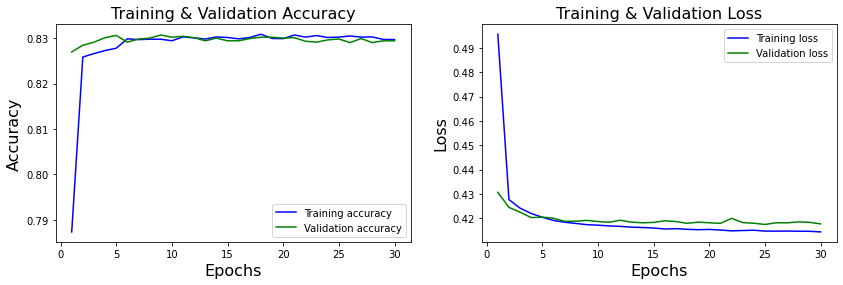

In [98]:
# Create learning curve for both train and validation datasets to evaluate under- and over-fitting

history_dict=fit_model.history
 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'g', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

plt.show()